Tristan MANIER - Léa GRASSIEN - Mathieu RAMEL - INFO 5 - 9/01/2024


# 1. Présentation des données

Pourquoi avons nous choisis ces données ?
TODO

source, conditions de recueil, nombre de fichiers, nombres de variables et d'individus, expliquer l'activité derrière les données.
TODO

Donnez la signification desindividus et des variables
TODO

## Questions

### Analyse
Nous allons chercher à répondre à ces questions :
- Quelles sont les sources de production d'énergie les plus corrélées ?
- Quelles est la proportion d'énergie renouvelable produite ?
- Quelles sont les tendances de méthode de production d'énergie au cours de l'année ?
- Quelles sont les périodes de l'année où la production d'énergie est la plus importante/faible ?
- Quelles sont les moments de la journée où la production d'énergie est la plus importante/faible ?
- La météo influe-t-elle sur la consomation d'énergie ?
- Quelles sont les sources de production d'énergie les plus corrélées avec la météo ?
- Classification des jousrsde l'année par rapport à la consomation d'énergie.

### Prédictions
- Quelle est la tendance de production d'énergie pour les jours/mois/années à venir ?
- 

# 2. Préparation des données

Ce notebook présente les commandes utiles pour les principales tâches de préparation des données. Les données `notes.data` qui servent d'illustration sont des notes obtenues par des étudiants dans des matières.

In [26]:
import pandas as pd
pd.set_option('display.max_rows', 100)     # Set the maximum number of rows displayed to 100 rows

import math

## 2.1 Premier dataset sur la production d'énergie

In [27]:
df = pd.read_csv("eCO2mix_RTE_En-cours-TR.csv", sep="\t", encoding='latin-1', index_col=False)

df.head()

C:\Users\tmani\AppData\Local\Temp\ipykernel_21356\1607583081.py:1: DtypeWarning: Columns (5,26,27,30,31,33,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("eCO2mix_RTE_En-cours-TR.csv", sep="\t", encoding='latin-1', index_col=False)


,Périmètre,Nature,Date,Heures,Consommation,Prévision J-1,Prévision J,Fioul,Charbon,Gaz,...,Hydraulique - Fil de l?eau + éclusée,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bioénergies - Déchets,Bioénergies - Biomasse,Bioénergies - Biogaz,Stockage batterie,Déstockage batterie,Eolien terrestre,Eolien offshore
0,France,Données temps réel,2022-06-01,00:00,44940.0,44800,45100.0,144.0,0.0,3596.0,...,4331,1054,1677.0,170,584.0,286.0,ND,ND,ND,ND
1,France,Données temps réel,2022-06-01,00:15,43967.0,43700,43900.0,144.0,0.0,3716.0,...,4163,1419,581.0,171,560.0,276.0,ND,ND,ND,ND
2,France,Données temps réel,2022-06-01,00:30,42514.0,42600,42700.0,142.0,0.0,2880.0,...,4187,1280,530.0,169,561.0,276.0,ND,ND,ND,ND
3,France,Données temps réel,2022-06-01,00:45,41073.0,41450,41600.0,143.0,0.0,2699.0,...,4054,1120,361.0,170,563.0,276.0,ND,ND,ND,ND
4,France,Données temps réel,2022-06-01,01:00,40359.0,40300,40500.0,144.0,3.0,2718.0,...,4068,1101,373.0,170,563.0,276.0,ND,ND,ND,ND


In [28]:
print(f"{df.shape[0]} rows and {df.shape[1]} columns")

# Combine dtypre, count and nnunique
pd.concat([df.dtypes, df.count(), df.nunique()], keys=["Types", "Count", "NUnique"], axis=1)

52705 rows and 40 columns


,Types,Count,NUnique
Périmètre,object,52705,2
Nature,object,52704,1
Date,object,52704,549
Heures,object,52704,96
Consommation,float64,52479,26699
Prévision J-1,object,52704,1973
Prévision J,float64,52512,2035
Fioul,float64,52479,1147
Charbon,float64,52479,1594
Gaz,float64,52479,8782


### Statistiques descriptives des valeurs non-définies

In [29]:
temp = ({
    'column':[],
    'nb_lines' :[],
    'nb_ND':[]
})

nd = pd.DataFrame(temp)

for column in df.columns : 
    new_row = pd.DataFrame({'column': column, 'nb_lines': df[column].count(), 'nb_ND': (df[column] == 'ND').sum()}, index=[0])
    nd = pd.concat([new_row, nd.loc[:]]).reset_index(drop=True)
nd = nd.sort_values(by='nb_ND', ascending=False)

nd["%ND"] = nd["nb_ND"] / nd["nb_lines"] * 100

nd

,column,nb_lines,nb_ND,%ND
0,Eolien offshore,52479.0,39838.0,75.912270
1,Eolien terrestre,52479.0,39838.0,75.912270
2,Déstockage batterie,52479.0,28224.0,53.781513
3,Stockage batterie,52479.0,28224.0,53.781513
34,Prévision J-1,52704.0,95.0,0.180252
9,Hydraulique - Fil de l?eau + éclusée,52479.0,8.0,0.015244
12,Gaz - Cogén.,52479.0,7.0,0.013339
13,Gaz - TAC,52479.0,6.0,0.011433
8,Hydraulique - Lacs,52479.0,3.0,0.005717
6,Bioénergies - Déchets,52479.0,1.0,0.001906


## 2.2 Deuxième dataset sur les données météo

In [30]:
df_weather = pd.read_csv("donnees-synop-essentielles-omm.csv", sep=";", index_col=False, encoding='utf-8')

# df_weather.head()
print(f"{df_weather.shape[0]} rows and {df_weather.shape[1]} columns")

df_weather.head()

341186 rows and 60 columns


,numer_sta,date,pmer,tend,cod_tend,dd,ff,t,td,u,...,nnuage2,ctype2,hnuage2,nnuage3,ctype3,hnuage3,nnuage4,ctype4,hnuage4,Unnamed: 59
0,7005,20220101000000,102420,-10,7,170,2.100000,284.450000,283.350000,93,...,None,None,None,None,None,None,None,None,None,NaN
1,7015,20220101000000,102420,20,0,180,4.200000,284.650000,283.350000,92,...,None,None,None,None,None,None,None,None,None,NaN
2,7020,20220101000000,102090,-120,8,190,10.600000,285.750000,284.950000,95,...,None,None,None,None,None,None,None,None,None,NaN
3,7027,20220101000000,102360,-80,8,180,6.200000,286.050000,285.250000,95,...,None,None,None,None,None,None,None,None,None,NaN
4,7037,20220101000000,102520,-60,6,150,3.500000,283.850000,283.250000,96,...,8,None,1110,None,None,None,None,None,None,NaN


Selection des données d'une seule région. (Pourais être remplacer par une moyenne des régions) 

In [31]:
code_region = int('07149')  # Ile-de-France
df_weather = df_weather[df_weather["numer_sta"] == code_region]

# df_weather.head()
print(f"{df_weather.shape[0]} rows and {df_weather.shape[1]} columns")

5690 rows and 60 columns


Formattage des données météo.

Parmis toutes les données météo fournies, nous avons choisis de ne garder que les données les plus pertinantes pour nous. De plus, nous les avons renomer pour facilité leur utilisation et leur lisibilité.

In [32]:
#multiplier les colonnes par 3 pour avoir 1 lignes par heures
weather_rename_map = {
    'date': 'date',
    'pmer': 'pression_mer',
    'ff': 'vitesse_vent',
    't': 'température',
    'u': 'humidité',
    'pres': 'pression',
    'niv_bar': 'niveau_barometrique',
    'tn12': 't_min_12h',
    'tn24': 't_min_24h',
    'tx12': 't_max_12h',
    'tx24': 't_max_24h',
    'tminsol': 't_min_sol_12h',
    'rr1': 'précipitation_1h',
    'rr3': 'précipitation_3h',
    'rr6': 'précipitation_6h',
    'rr12': 'précipitation_12h',
    'rr24': 'précipitation_24h',
    'ssfrai': 'hauteur_neige'
}

df_weather = df_weather.rename(columns=weather_rename_map)

# remove columns not in weather_rename_map
for col_name in df_weather.columns.values.tolist():
    if col_name not in weather_rename_map.values():
        df_weather = df_weather.drop(col_name, axis=1)

df_weather = df_weather.reset_index(drop=True)

# convert object to float
for col_name in df_weather.columns.values.tolist():
    df_weather[col_name] = pd.to_numeric(df_weather[col_name], errors='coerce')

#df_weather.head()

#df_weather.dtypes

Suppresion des lignes avec des valeurs manquantes pour les dates et heures.

In [33]:
df = df.dropna(subset=['Date', "Heures"])

## 2.3 Jointure des deux datasets

Formatage des dates et heures des deux datasets.

In [34]:
# Concat date and hours
df['date'] = df['Date'].astype(str) + df['Heures'].astype(str)

# Convert to datetime
df['date'] = df['date'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d%H:%M'))

df_weather["date"] = df_weather['date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d%H%M%S'))

Fusion des deux datasets

In [35]:
df_full = pd.merge(df, df_weather, how='inner', on = 'date' )

# full_df.head()
print(f"df : {df.shape[0]} rows and {df.shape[1]} columns")
print(f"df_weather : {df_weather.shape[0]} rows and {df_weather.shape[1]} columns")
print(f"df_full : {df_full.shape[0]} rows and {df_full.shape[1]} columns")

print(f"Data between {df_full['date'].min()} and {df_full['date'].max()}")

df : 52704 rows and 41 columns
df_weather : 5690 rows and 18 columns
df_full : 4378 rows and 58 columns
Data between 2022-06-01 00:00:00 and 2023-12-01 21:00:00


# 3. Analyse des données

Selection d'une periode de temps

In [36]:
from matplotlib import pyplot as plt

#select rows between date1 and date 2
date1 = pd.to_datetime('2022-06-01')
date2 = pd.to_datetime('2023-12-01')

df_selection = df_full[(df_full['date'] >= date1) & (df_full['date'] < date2)]

Visualisation des données de consomations

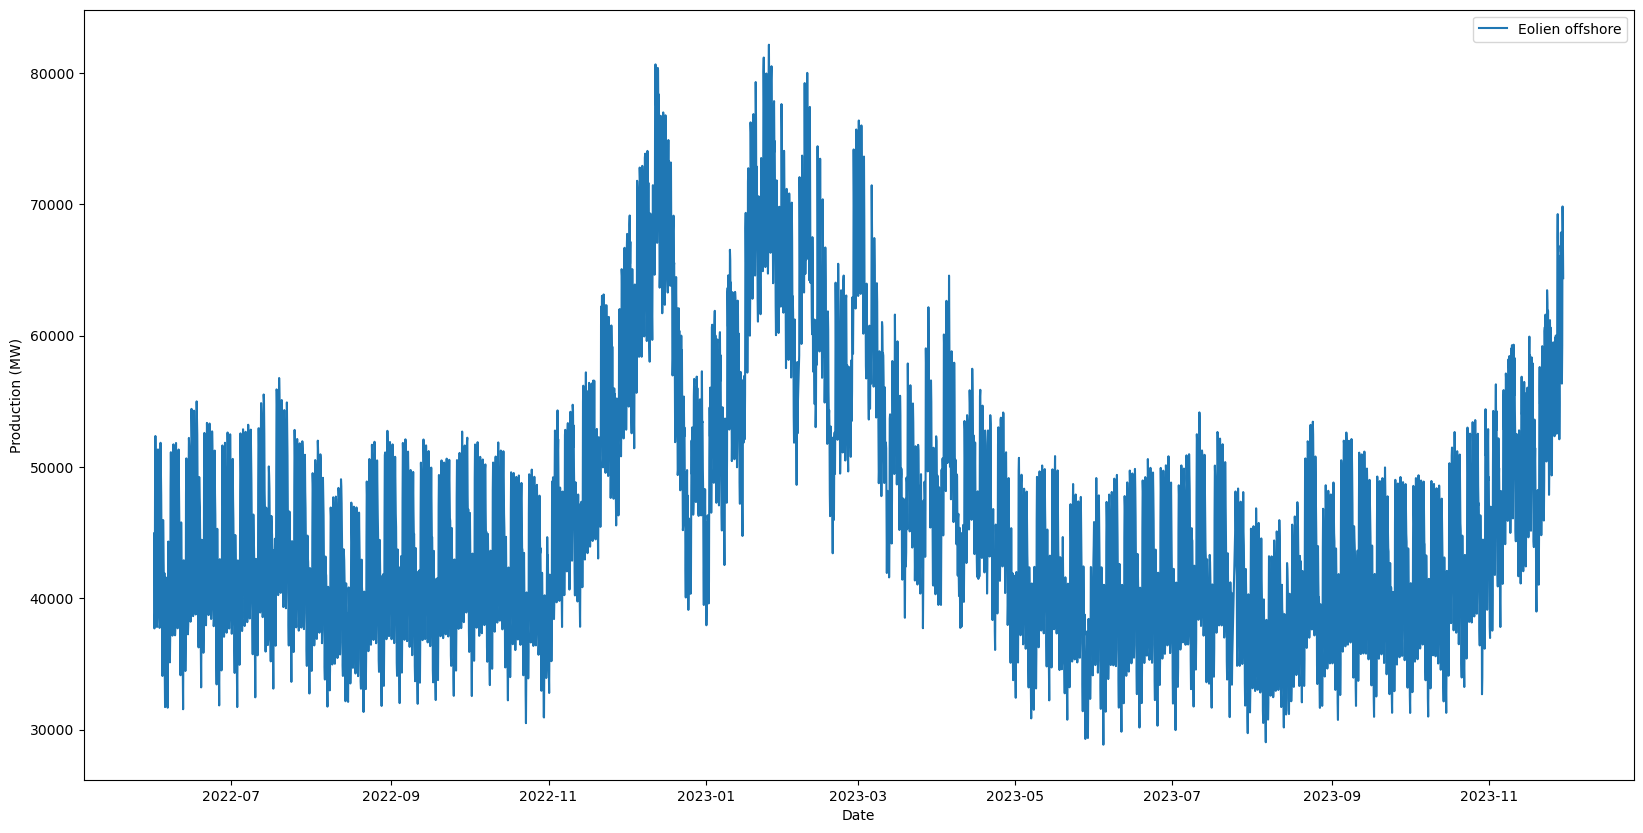

In [37]:
figure = plt.figure(figsize=(20,10))
plt.plot(df_selection["date"], df_selection["Consommation"], label=column)
plt.legend( loc='upper right', numpoints = 1 )
plt.xlabel('Date')
plt.ylabel('Production (MW)')
plt.show()

Visualisation des données de production

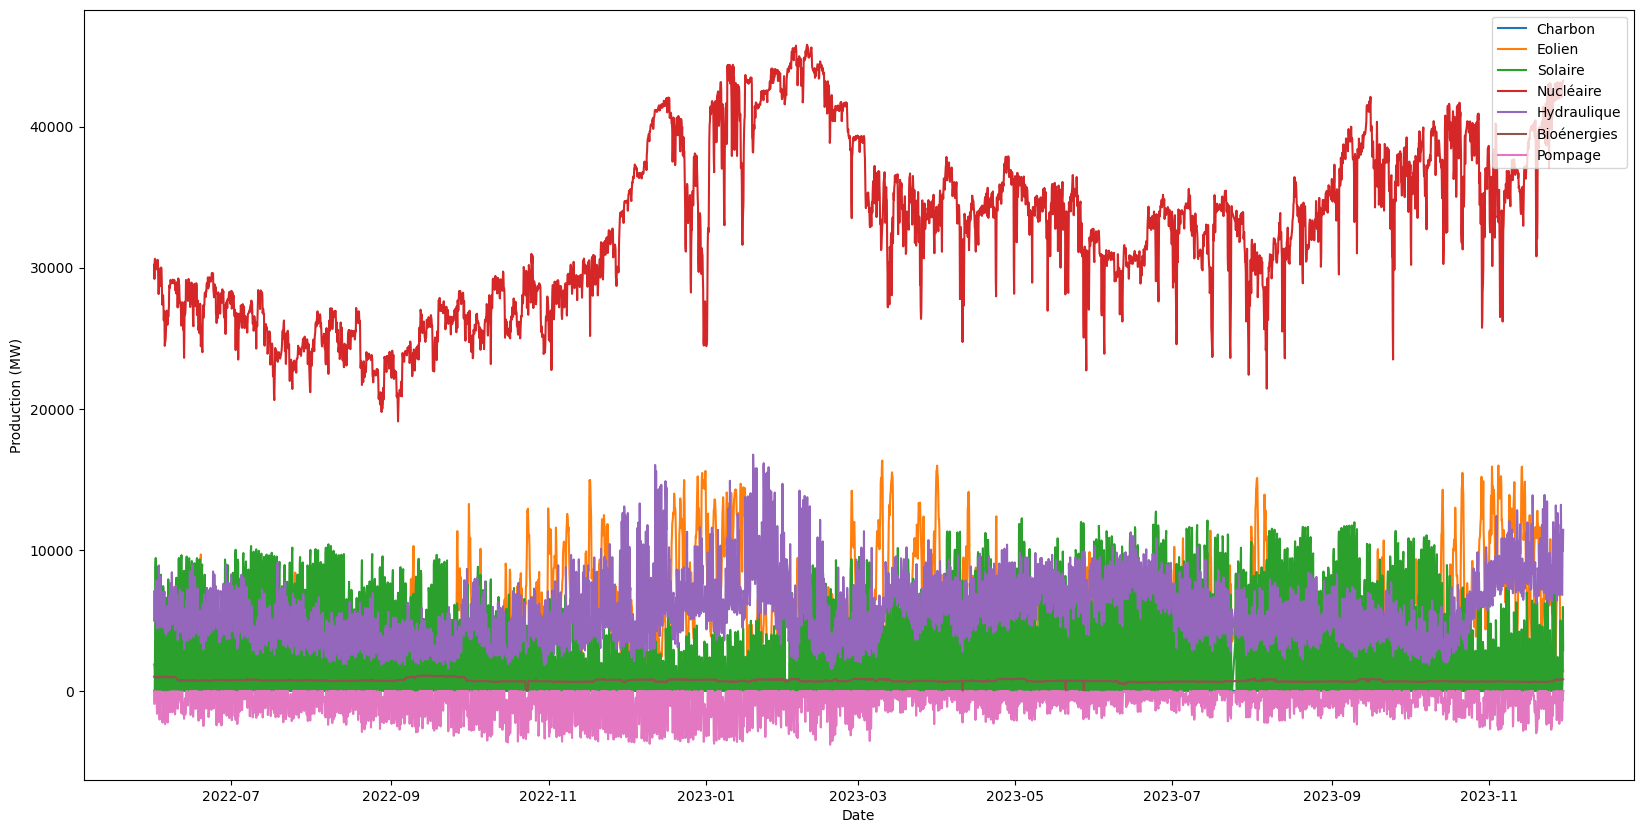

In [38]:
to_plot = ["Charbon", "Eolien", "Solaire", "Nucléaire", "Hydraulique", "Bioénergies", "Pompage"]

figure = plt.figure(figsize=(20,10))
for column in to_plot :
    plt.plot(df_selection["date"], df_selection[column], label=column)
    plt.legend( loc='upper right', numpoints = 1 )

plt.xlabel('Date')
plt.ylabel('Production (MW)')
plt.show()


### Quelles sont les sources de production d'énergie les plus corrélées ?

Selections des colonnes liées à la production et description de celles-ci

In [39]:
df_energies = df_full[["Charbon", "Gaz", "Fioul", "Nucléaire", "Eolien", "Solaire", "Hydraulique", "Bioénergies", "Consommation"]]

df_energies.describe()

,Charbon,Gaz,Fioul,Nucléaire,Eolien,Solaire,Hydraulique,Bioénergies,Consommation
count,4360.000000,4360.000000,4360.000000,4360.000000,4360.000000,4360.000000,4360.000000,4360.000000,4360.000000
mean,145.948165,3651.220413,195.001376,32768.459633,4713.397248,2451.356193,5549.383257,736.300688,47218.023165
std,357.560212,2216.933527,152.804293,5896.389926,3450.006543,3295.664765,2332.773824,99.934680,9571.565877
min,0.000000,243.000000,106.000000,19107.000000,557.000000,0.000000,1578.000000,0.000000,28847.000000
25%,14.000000,2053.750000,135.000000,27941.750000,2073.000000,0.000000,3774.250000,676.000000,40380.000000
50%,25.000000,3393.000000,148.000000,33105.000000,3529.000000,279.500000,5228.000000,711.000000,45912.500000
75%,41.000000,4778.500000,190.000000,36949.250000,6407.250000,4501.750000,6877.250000,782.000000,51767.500000
max,1835.000000,9728.000000,1453.000000,45799.000000,16331.000000,12721.000000,16754.000000,1109.000000,82142.000000


Matrice de corrélation

In [40]:
df_energies.corr()

,Charbon,Gaz,Fioul,Nucléaire,Eolien,Solaire,Hydraulique,Bioénergies,Consommation
Charbon,1.000000,0.590869,0.282177,0.339783,-0.051830,-0.120136,0.224975,0.097650,0.612983
Gaz,0.590869,1.000000,0.332820,0.224743,-0.159937,-0.201810,0.232469,0.155626,0.708223
Fioul,0.282177,0.332820,1.000000,0.131596,-0.014645,-0.111127,0.244561,0.020182,0.350129
Nucléaire,0.339783,0.224743,0.131596,1.000000,0.164680,-0.138626,0.402433,-0.161829,0.565698
Eolien,-0.051830,-0.159937,-0.014645,0.164680,1.000000,-0.189118,0.122389,-0.079830,0.110080
Solaire,-0.120136,-0.201810,-0.111127,-0.138626,-0.189118,1.000000,-0.181471,-0.064459,0.096625
Hydraulique,0.224975,0.232469,0.244561,0.402433,0.122389,-0.181471,1.000000,-0.139877,0.482277
Bioénergies,0.097650,0.155626,0.020182,-0.161829,-0.079830,-0.064459,-0.139877,1.000000,0.072935
Consommation,0.612983,0.708223,0.350129,0.565698,0.110080,0.096625,0.482277,0.072935,1.000000


#### Conclusion
TODO: Mathieu

### Quelles est la proportion d'énergie renouvelable produite ?

Calcul de la production globale d'énergie sur la période du dataset

In [41]:
name_col =["Charbon", "Gaz", "Fioul", "Nucléaire", "Eolien", "Solaire", "Hydraulique", "Bioénergies"]

df_energies = df_full[name_col]

df_energies = df_energies.dropna()

total_energies = sum(df_energies.sum(axis=1))
print(f"Production total : {total_energies} MW")

Production total : 218920252.0 MW


Calcul des proportions de chaque source d'énergie

In [42]:
sum_dic = {}
pourcent_dic = {}
for col in name_col:
    sum_dic[col] = sum(df_energies[col])
    pourcent_dic[col] = sum_dic[col]/total_energies*100
    
pourcent_df = pd.DataFrame.from_dict(pourcent_dic, orient='index', columns=['%'])
print(pourcent_df)

                     %
Charbon       0.290669
Gaz           7.271744
Fioul         0.388363
Nucléaire    65.261429
Eolien        9.387168
Solaire       4.882103
Hydraulique  11.052112
Bioénergies   1.466411


Aggrégation des sources d'énergie en 3 catégories : renouvelable, fossile et nucléaire

In [43]:
renouvelable = ["Eolien","Solaire","Hydraulique","Bioénergies"]
pourcent_renouvelable = sum([pourcent_dic[nrj12] for nrj12 in renouvelable])
print(f"Pourcentage d'énergie renouvelable : {pourcent_renouvelable:.2f} %")

fossil = ["Charbon","Gaz","Fioul"]
pourcent_fossil = sum([pourcent_dic[nrj12] for nrj12 in fossil])
print(f"Pourcentage d'énergie fossile : {pourcent_fossil:.2f} %")

nuclear = ["Nucléaire"]
pourcent_nuclear = sum([pourcent_dic[nrj12] for nrj12 in nuclear])
print(f"Pourcentage d'énergie nucléaire : {pourcent_nuclear:.2f} %")

Pourcentage d'énergie renouvelable : 26.79 %
Pourcentage d'énergie fossile : 7.95 %
Pourcentage d'énergie nucléaire : 65.26 %


Les énergies renouvelables représente plus d'un quart de la production total d'énergie.

### Quelles sont les tendances de méthode de production d'énergie au cours de l'année ?
TODO: mathieu
separer données en plusieurs periode et les plot

### La météo influe-t-elle sur la consomation d'énergie ?


In [44]:
col_names = ["Consommation", "température", "vitesse_vent", "humidité", "pression", "précipitation_24h", "hauteur_neige"]
# df_full.columns.values.tolist()

df_selection = df_full[col_names]
#removes lines with nan or None
df_selection = df_selection.dropna()

df_selection.describe()

,Consommation,température,vitesse_vent,humidité,pression,précipitation_24h,hauteur_neige
count,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000
mean,49289.031503,287.212495,3.914049,71.564921,100562.490421,1.822095,0.000004
std,9988.467408,7.734232,1.953747,18.777471,926.887533,4.457989,0.000206
min,28847.000000,267.050000,0.000000,14.000000,96290.000000,-0.100000,0.000000
25%,42227.000000,281.850000,2.500000,58.000000,100080.000000,0.000000,0.000000
50%,48138.000000,286.550000,3.700000,75.000000,100630.000000,0.000000,0.000000
75%,54325.000000,292.750000,5.200000,87.000000,101150.000000,1.600000,0.000000
max,82142.000000,309.050000,12.200000,100.000000,103070.000000,44.000000,0.010000


Matrice de corrélation

In [45]:
corr_matrix = df_selection.corr()

# for only the "Consommation" column sort by descending order of absolute values
pd.DataFrame(corr_matrix["Consommation"].sort_values(ascending=False, key=lambda x: abs(x)))

,Consommation
Consommation,1.000000
température,-0.561525
pression,0.131404
humidité,0.110625
précipitation_24h,-0.095645
vitesse_vent,0.089070
hauteur_neige,0.054114


### Conclusion

On remarque que la température est inversement corrélée avec la consomation d'énergie. Cela est logique car plus il fait froid, plus les gens chauffent leur logement.
Cependant c'est la seule corrélation notable.

### Quelles sont les sources de production d'énergie les plus corrélées avec la météo ?

In [46]:
col_names_prod =["Charbon", "Gaz", "Fioul", "Nucléaire", "Eolien", "Solaire", "Hydraulique", "Bioénergies"]
col_names_weather = ["température", "vitesse_vent", "humidité", "pression", "précipitation_24h", "hauteur_neige"]

df_selection = df_full[col_names_prod + col_names_weather]
df_selection = df_selection.dropna()

df_selection.describe()

,Charbon,Gaz,Fioul,Nucléaire,Eolien,Solaire,Hydraulique,Bioénergies,température,vitesse_vent,humidité,pression,précipitation_24h,hauteur_neige
count,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000
mean,182.846318,3846.537676,196.538101,33523.229034,4933.463176,3125.917412,5682.726692,730.951043,287.212495,3.914049,71.564921,100562.490421,1.822095,0.000004
std,403.679060,2413.278162,147.575528,5941.525968,3652.194985,3581.603563,2496.196559,97.395568,7.734232,1.953747,18.777471,926.887533,4.457989,0.000206
min,0.000000,243.000000,107.000000,19774.000000,557.000000,0.000000,1578.000000,0.000000,267.050000,0.000000,14.000000,96290.000000,-0.100000,0.000000
25%,14.000000,2027.000000,137.000000,28702.000000,2093.000000,0.000000,3790.000000,674.000000,281.850000,2.500000,58.000000,100080.000000,0.000000,0.000000
50%,27.000000,3501.000000,164.000000,33816.000000,3624.000000,1518.000000,5300.000000,705.000000,286.550000,3.700000,75.000000,100630.000000,0.000000,0.000000
75%,47.000000,5286.000000,197.000000,38162.000000,6824.000000,5742.000000,7001.000000,783.000000,292.750000,5.200000,87.000000,101150.000000,1.600000,0.000000
max,1835.000000,9728.000000,1442.000000,45799.000000,16331.000000,12083.000000,16145.000000,1092.000000,309.050000,12.200000,100.000000,103070.000000,44.000000,0.010000


In [47]:
#create a dataset with with the correlation between the production and the weather for each energy
corr_dataset = pd.DataFrame()
for col_name in col_names_prod:
    current_df = df_selection[[col_name] + col_names_weather]
    corr_matrix = current_df.corr()

    corr_list = corr_matrix[col_name]
    
    corr_dataset.insert(0, col_name, corr_matrix[col_name])

corr_dataset.dropna()

,Bioénergies,Hydraulique,Solaire,Eolien,Nucléaire,Fioul,Gaz,Charbon
température,-0.107017,-0.426612,0.631816,-0.273598,-0.575566,-0.335713,-0.544218,-0.510578
vitesse_vent,-0.001051,0.064231,0.164533,0.639315,0.012601,-0.029842,-0.194520,-0.081827
humidité,0.023190,0.245030,-0.726843,0.273818,0.267622,0.143183,0.265001,0.201082
pression,0.083321,-0.036470,0.118623,-0.464342,0.094257,0.019468,0.245654,0.131551
précipitation_24h,0.053438,0.003623,-0.088554,0.213873,-0.078030,-0.039498,-0.093169,-0.100703
hauteur_neige,-0.012070,0.072871,-0.016321,-0.016969,0.027629,0.053495,0.050178,0.083407


### Conclusion

On remarque que la température influence toutes les produciont d'énérgie, quand il fait froid la production augmentent et inversement. Sauf pour le solaire qui est invers car on produit plus d'énergie solaire en été lorsque le soeil est haut.

L'autre corrélation notable est celle entre le solaire et l'humidité. Cela est logique car il y a plus de nuage lorsque l'humidité est élevée et donc moins de soleil. De même pour les temps pluvieux. Cependant la corrélation entre le solaire et les précipitations des dernières 24h est inexistante, ce qui est très étonnant.

L'humidité à également un impact sur la production d'énégie hydrolique. Cela est logique car il y a plus d'eau dans les barages. Cependant elle a également in impact sur l'éolien, le nucléaire, le gaz et le charbon. Cela est plus difficile à expliquer.

La dernière corrélation est entre la vitesse du vent, la pression et la production d'énérgie éolienne qui est tout à fait logique, les pression et dépression entrainne du vent qui favorisent la production d'énergie éolienne.

# 4. Prédiction

### Quelle est la tendance de production d'énergie pour les jours/mois/années à venir ?


In [48]:
#time series prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#select rows between date1 and date 2

date1 = pd.to_datetime('2022-06-01')
date2 = pd.to_datetime('2023-12-01')

df_selection = df_full[(df_full['date'] >= date1) & (df_full['date'] < date2)]

#df_selection = df_selection[col_names_prod + col_names_weather]

df_selection = df_selection.dropna()

X = df_selection[col_names_weather]
y = df_selection["Nucléaire"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression().fit(X_train, y_train)

reg.score(X_test, y_test)

y_pred = reg.predict(X_test)

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
# fit model
model = ARIMA(data, order=(0, 0, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

ModuleNotFoundError: No module named 'statsmodels'